# Analysing 2020 and 2024 US Presidential Election Results with Demographic Data

## What is the purpose of this analysis?

## Data Collection
### Importing full 2024 County level results

In [12]:
import pandas as pd
county2024 = pd.read_csv("/Users/joshwallace/Downloads/2024_US_County_Level_Presidential_Results.csv")

In [13]:
county2024.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,20484,7439,28190,13045.0,0.726641,0.263888,0.462753
1,Alabama,1003,Baldwin County,95798,24934,121808,70864.0,0.786467,0.204699,0.581768
2,Alabama,1005,Barbour County,5606,4158,9832,1448.0,0.570179,0.422905,0.147274
3,Alabama,1007,Bibb County,7572,1619,9241,5953.0,0.819392,0.175197,0.644194
4,Alabama,1009,Blount County,25354,2576,28115,22778.0,0.901796,0.091624,0.810173


### Importing 2020 County level results

In [14]:
county2020 = pd.read_csv("/Users/joshwallace/Downloads/2020_US_County_Level_Presidential_Results.csv")

In [15]:
county2020.head()

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
0,Alabama,1001,Autauga County,19838,7503,27770,12335,0.714368,0.270184,0.444184
1,Alabama,1003,Baldwin County,83544,24578,109679,58966,0.761714,0.224090,0.537623
2,Alabama,1005,Barbour County,5622,4816,10518,806,0.534512,0.457882,0.076631
3,Alabama,1007,Bibb County,7525,1986,9595,5539,0.784263,0.206983,0.577280
4,Alabama,1009,Blount County,24711,2640,27588,22071,0.895716,0.095694,0.800022


### Import the overall results in the 8 states that are within 5% either side

In [17]:
ss28 = pd.read_csv("/Users/joshwallace/Downloads/Swing States 2028 - Sheet1.csv")

In [18]:
ss28

,State,Trump % 2024,Harris % 2024,Trump % 2020,Biden % 2020,Trump Raw 2024,Harris Raw 2024,Trump Raw 2020,Biden Raw 2020,% Difference 2024
0,Minnesota,46.7,50.9,45.3,52.4,"1,519,032","1,656,979","1,484,065","1,717,077",4.2
1,New Hampshire,47.9,50.7,45.4,52.7,"395,531","418,496","365,660","424,937",2.8
2,Wisconsin,49.7,48.9,48.8,49.4,"1,697,298","1,667,881","1,610,184","1,630,866",-0.8
3,Michigan,49.7,48.3,47.8,50.6,"2,816,636","2,736,533","2,649,852","2,804,040",-1.4
4,Pennsylvania,50.4,48.7,48.8,50.0,"3,542,505","3,421,088","3,378,263","3,459,923",-1.7
5,Georgia,50.7,48.5,49.2,49.5,"2,663,117","2,548,017","2,461,854","2,473,633",-2.2
6,Nevada,50.6,47.5,47.7,50.1,"750,095","703,902","669,890","703,486",-3.1
7,North Carolina,50.9,47.7,49.9,48.6,"2,898,428","2,715,380","2,758,775","2,684,292",-3.2


## Data cleaning/manipulation
### Select just the counties from the projected swing states from the 2024 results

In [35]:
key_county_results_2024 = pd.DataFrame(columns = county2024.columns)

key_states = list(ss28["State"])

for key_state in key_states:
    key_state_counties = county2024[(county2024['state_name'] == key_state)].index
    for i in key_state_counties:
        key_county_results_2024.loc[i] = county2024.loc[i]

In [36]:
key_county_results_2024

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
1332,Minnesota,27001,Aitkin County,6741,3524,10419,3217.0,0.646991,0.338228,0.308763
1333,Minnesota,27003,Anoka County,106974,97667,209656,9307.0,0.510236,0.465844,0.044392
1334,Minnesota,27005,Becker County,12961,6435,19696,6526.0,0.658052,0.326716,0.331336
1335,Minnesota,27007,Beltrami County,12898,11493,24807,1405.0,0.519934,0.463297,0.056637
1336,Minnesota,27009,Benton County,15260,7084,22763,8176.0,0.670386,0.311207,0.359179
...,...,...,...,...,...,...,...,...,...,...
2003,North Carolina,37191,Wayne County,31580,22618,54667,8962.0,0.577679,0.413741,0.163938
2004,North Carolina,37193,Wilkes County,28812,7194,36240,21618.0,0.795033,0.19851,0.596523
2005,North Carolina,37195,Wilson County,19750,19909,39978,-159.0,0.494022,0.497999,-0.003977
2006,North Carolina,37197,Yadkin County,16439,3739,20346,12700.0,0.807972,0.183771,0.624201


### Select just the counties from the projected swing states from the 2020 results

In [37]:
key_county_results_2020 = pd.DataFrame(columns = county2020.columns)

key_states = list(ss28["State"])

for key_state in key_states:
    key_state_counties = county2020[(county2020['state_name'] == key_state)].index
    for i in key_state_counties:
        key_county_results_2020.loc[i] = county2020.loc[i]

In [38]:
key_county_results_2020

,state_name,county_fips,county_name,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff
1324,Minnesota,27001,Aitkin County,6258,3607,10025,2651,0.624239,0.3598,0.264439
1325,Minnesota,27003,Anoka County,104902,100893,211132,4009,0.496855,0.477867,0.018988
1326,Minnesota,27005,Becker County,12438,6589,19401,5849,0.641101,0.339622,0.301479
1327,Minnesota,27007,Beltrami County,12188,11426,24189,762,0.503865,0.472363,0.031502
1328,Minnesota,27009,Benton County,14382,7280,22260,7102,0.646092,0.327044,0.319048
...,...,...,...,...,...,...,...,...,...,...
1995,North Carolina,37191,Wayne County,30709,24215,55537,6494,0.552947,0.436016,0.116931
1996,North Carolina,37193,Wilkes County,27592,7511,35466,20081,0.777985,0.21178,0.566204
1997,North Carolina,37195,Wilson County,19581,20754,40735,-1173,0.480692,0.509488,-0.028796
1998,North Carolina,37197,Yadkin County,15933,3763,19923,12170,0.799729,0.188877,0.610852


### Import the county level age and sex data and select the most recent figures

In [54]:
age_sex = pd.read_csv("/Users/joshwallace/Downloads/Population by Age and Sex - US, States, Counties.csv")
age_sex_2019 = age_sex[age_sex['Year'] == 2019]

### Select the data only for the relevant counties based on the index ID

In [76]:
key_county_age_sex_2019 = pd.DataFrame(columns = age_sex_2019.columns)

county_codes = []

for i in range(0, 595): #number of counties being focused on
    county_codes.append(key_county_results_2024.iloc[i]['county_fips'])

for j, county_code in enumerate(county_codes):
    county_code_age_sex_2019 = age_sex_2019[(age_sex_2019['IBRC_Geo_ID'] == county_code)]
    key_county_age_sex_2019 = pd.concat([key_county_age_sex_2019, county_code_age_sex_2019], ignore_index=True)

In [77]:
key_county_age_sex_2019

,IBRC_Geo_ID,Statefips,Countyfips,Description,Year,Total Population,Population 0-4,Population 5-17,Population 18-24,Population 25-44,Population 45-64,Population 65+,Population Under 18,Population 18-54,Population 55+,Male Population,Female Population
0,27001,27,1,"Aitkin County, MN",2019,15886.0,582.0,2036.0,821.0,2531.0,4543.0,5373.0,2618.0,4978.0,8290.0,7995.0,7846.0
1,27003,27,3,"Anoka County, MN",2019,356921.0,22302.0,62457.0,27489.0,95194.0,97698.0,51781.0,84759.0,170141.0,102021.0,178857.0,178681.0
2,27005,27,5,"Becker County, MN",2019,34423.0,2120.0,6193.0,2508.0,7456.0,8872.0,7274.0,8313.0,13700.0,12410.0,17187.0,17274.0
3,27007,27,7,"Beltrami County, MN",2019,47188.0,3276.0,8570.0,6134.0,11135.0,10300.0,7773.0,11846.0,21799.0,13543.0,23536.0,23669.0
4,27009,27,9,"Benton County, MN",2019,40889.0,2893.0,7503.0,3245.0,11596.0,9794.0,5858.0,10396.0,19730.0,10763.0,20399.0,20539.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,37191,37,191,"Wayne County, NC",2019,123131.0,8085.0,21015.0,11769.0,30632.0,30828.0,20802.0,29100.0,56961.0,37070.0,60655.0,63249.0
591,37193,37,193,"Wilkes County, NC",2019,68412.0,3466.0,10318.0,5174.0,14893.0,19399.0,15162.0,13784.0,29267.0,25361.0,33583.0,34713.0
592,37195,37,195,"Wilson County, NC",2019,81801.0,4829.0,13748.0,7081.0,19222.0,21584.0,15337.0,18577.0,36597.0,26627.0,38735.0,43040.0
593,37197,37,197,"Yadkin County, NC",2019,37667.0,1967.0,5849.0,2827.0,8261.0,11052.0,7711.0,7816.0,16501.0,13350.0,18609.0,19008.0


### Import the county level race data and select the most recent data

In [82]:
race = pd.read_csv("/Users/joshwallace/Downloads/Population by Race - US, States, Counties.csv")
race_2019 = race[race['Year'] == 2019]

In [84]:
key_county_race_2019 = pd.DataFrame(columns = race_2019.columns)

for county_code in county_codes:
    county_code_race_2019 = race_2019[(race_2019['IBRC_Geo_ID'] == county_code)]
    key_county_race_2019 = pd.concat([key_county_race_2019, county_code_race_2019], ignore_index=True)

In [85]:
key_county_race_2019

,IBRC_Geo_ID,Statefips,Countyfips,Description,Year,Total Population,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hawaiian or Pacific Islander Alone,Two or More Races,Not Hispanic,Hispanic
0,27001,27,1,"Aitkin County, MN",2019,15886.0,15055.0,91.0,427.0,47.0,5.0,261.0,15660.0,226.0
1,27003,27,3,"Anoka County, MN",2019,356921.0,298979.0,26336.0,3179.0,17759.0,221.0,10447.0,339551.0,17370.0
2,27005,27,5,"Becker County, MN",2019,34423.0,30032.0,226.0,2786.0,186.0,13.0,1180.0,33642.0,781.0
3,27007,27,7,"Beltrami County, MN",2019,47188.0,34382.0,408.0,10470.0,357.0,25.0,1546.0,45972.0,1216.0
4,27009,27,9,"Benton County, MN",2019,40889.0,37135.0,2124.0,261.0,468.0,11.0,890.0,39764.0,1125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,37191,37,191,"Wayne County, NC",2019,123131.0,77361.0,39855.0,1049.0,1648.0,189.0,3029.0,107804.0,15327.0
591,37193,37,193,"Wilkes County, NC",2019,68412.0,63424.0,3204.0,283.0,394.0,60.0,1047.0,63684.0,4728.0
592,37195,37,195,"Wilson County, NC",2019,81801.0,45685.0,33121.0,529.0,1024.0,111.0,1331.0,72982.0,8819.0
593,37197,37,197,"Yadkin County, NC",2019,37667.0,35382.0,1285.0,273.0,173.0,48.0,506.0,33329.0,4338.0


### Import the county level economic data

In [962]:
economic_data = pd.read_excel("/Users/joshwallace/Downloads/Unemployment2023.xlsx")

In [963]:
economic_data.head()

,"Unemployment and median household income for the United States, States, and counties, 2000–23",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103
0,Sources: Unemployment: U.S. Department of Labo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIPS_Code,State,Area_Name,Rural_Urban_Continuum_Code_2023,Urban_Influence_Code_2013,Metro_2023,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2022,Employed_2022,Unemployed_2022,Unemployment_rate_2022,Civilian_labor_force_2023,Employed_2023,Unemployed_2023,Unemployment_rate_2023,Median_Household_Income_2022,Med_HH_Income_Percent_of_State_Total_2022
4,00000,US,United States,NaN,NaN,NaN,142601576,136904853,5696723,4,...,164341251,158342285,5998966,3.7,166689556,160623678,6065878,3.6,74755,NaN


### Clean this data by adjusting column names and removing irrelevant columns

In [980]:
economic_data.rename(columns = economic_data.iloc[3], inplace=True)
economic_data.drop([0,1,2,3], inplace=True)

In [981]:
economic_data.drop(['Rural_Urban_Continuum_Code_2023',
 'Urban_Influence_Code_2013','Civilian_labor_force_2000',
 'Employed_2000',
 'Unemployed_2000',
 'Unemployment_rate_2000',
 'Civilian_labor_force_2001',
 'Employed_2001',
 'Unemployed_2001',
 'Unemployment_rate_2001',
 'Civilian_labor_force_2002',
 'Employed_2002',
 'Unemployed_2002',
 'Unemployment_rate_2002',
 'Civilian_labor_force_2003',
 'Employed_2003',
 'Unemployed_2003',
 'Unemployment_rate_2003',
 'Civilian_labor_force_2004',
 'Employed_2004',
 'Unemployed_2004',
 'Unemployment_rate_2004',
 'Civilian_labor_force_2005',
 'Employed_2005',
 'Unemployed_2005',
 'Unemployment_rate_2005',
 'Civilian_labor_force_2006',
 'Employed_2006',
 'Unemployed_2006',
 'Unemployment_rate_2006',
 'Civilian_labor_force_2007',
 'Employed_2007',
 'Unemployed_2007',
 'Unemployment_rate_2007',
 'Civilian_labor_force_2008',
 'Employed_2008',
 'Unemployed_2008',
 'Unemployment_rate_2008',
 'Civilian_labor_force_2009',
 'Employed_2009',
 'Unemployed_2009',
 'Unemployment_rate_2009',
 'Civilian_labor_force_2010',
 'Employed_2010',
 'Unemployed_2010',
 'Unemployment_rate_2010',
 'Civilian_labor_force_2011',
 'Employed_2011',
 'Unemployed_2011',
 'Unemployment_rate_2011',
 'Civilian_labor_force_2012',
 'Employed_2012',
 'Unemployed_2012',
 'Unemployment_rate_2012',
 'Civilian_labor_force_2013',
 'Employed_2013',
 'Unemployed_2013',
 'Unemployment_rate_2013',
 'Civilian_labor_force_2014',
 'Employed_2014',
 'Unemployed_2014',
 'Unemployment_rate_2014',
 'Civilian_labor_force_2015',
 'Employed_2015',
 'Unemployed_2015',
 'Unemployment_rate_2015',
 'Civilian_labor_force_2016',
 'Employed_2016',
 'Unemployed_2016',
 'Unemployment_rate_2016',
 'Civilian_labor_force_2017',
 'Employed_2017',
 'Unemployed_2017',
 'Unemployment_rate_2017',
 'Civilian_labor_force_2018',
 'Employed_2018',
 'Unemployed_2018',
 'Unemployment_rate_2018',
 'Civilian_labor_force_2019',
 'Employed_2019',
 'Unemployed_2019',
 'Unemployment_rate_2019',
 'Civilian_labor_force_2020',
                    'Civilian_labor_force_2021',
 'Employed_2021',
 'Unemployed_2021',
 'Unemployment_rate_2021',
 'Civilian_labor_force_2022',
 'Employed_2022',
 'Unemployed_2022',
 'Unemployment_rate_2022',
 'Civilian_labor_force_2023','Med_HH_Income_Percent_of_State_Total_2022', 'Employed_2020', 'Unemployed_2020'], axis=1, inplace=True)

### Make the economic data into a DataFrame and select the data only from the swing state counties

In [113]:
key_county_economic = pd.DataFrame(columns = economic_data.columns)

for county_code in county_codes:
    county_code_economic = economic_data[(economic_data['FIPS_Code'] == str(county_code))]
    key_county_economic = pd.concat([key_county_economic, county_code_economic], ignore_index=True)

In [116]:
key_county_economic

,FIPS_Code,State,Area_Name,Metro_2023,Unemployment_rate_2020,Employed_2023,Unemployed_2023,Unemployment_rate_2023,Median_Household_Income_2022
0,27001,MN,"Aitkin County, MN",0,8.2,7155,359,4.8,59064
1,27003,MN,"Anoka County, MN",1,6.4,194226,5511,2.8,92249
2,27005,MN,"Becker County, MN",0,6.3,18931,582,3,67448
3,27007,MN,"Beltrami County, MN",0,6.4,24303,879,3.5,59882
4,27009,MN,"Benton County, MN",1,6.7,21039,788,3.6,71493
...,...,...,...,...,...,...,...,...,...
590,37191,NC,"Wayne County, NC",1,6.3,49551,1927,3.7,55635
591,37193,NC,"Wilkes County, NC",0,6.7,25352,981,3.7,48229
592,37195,NC,"Wilson County, NC",0,8.7,32264,1678,4.9,51535
593,37197,NC,"Yadkin County, NC",1,7,17054,554,3.1,61464


### Clean the data by removing Total Population that is a duplicate and combine the 3 demographic data sets into one

In [133]:
key_county_race_2019.drop(["Total Population"], axis=1, inplace=True)
key_county_demog = pd.concat([key_county_economic, key_county_race_2019, key_county_age_sex_2019], axis=1)

KeyError: "['Total Population'] not found in axis"

In [134]:
key_county_demog

,FIPS_Code,State,Area_Name,Metro_2023,Unemployment_rate_2020,Employed_2023,Unemployed_2023,Unemployment_rate_2023,Median_Household_Income_2022,IBRC_Geo_ID,...,Population 5-17,Population 18-24,Population 25-44,Population 45-64,Population 65+,Population Under 18,Population 18-54,Population 55+,Male Population,Female Population
0,27001,MN,"Aitkin County, MN",0,8.2,7155,359,4.8,59064,27001,...,2036.0,821.0,2531.0,4543.0,5373.0,2618.0,4978.0,8290.0,7995.0,7846.0
1,27003,MN,"Anoka County, MN",1,6.4,194226,5511,2.8,92249,27003,...,62457.0,27489.0,95194.0,97698.0,51781.0,84759.0,170141.0,102021.0,178857.0,178681.0
2,27005,MN,"Becker County, MN",0,6.3,18931,582,3,67448,27005,...,6193.0,2508.0,7456.0,8872.0,7274.0,8313.0,13700.0,12410.0,17187.0,17274.0
3,27007,MN,"Beltrami County, MN",0,6.4,24303,879,3.5,59882,27007,...,8570.0,6134.0,11135.0,10300.0,7773.0,11846.0,21799.0,13543.0,23536.0,23669.0
4,27009,MN,"Benton County, MN",1,6.7,21039,788,3.6,71493,27009,...,7503.0,3245.0,11596.0,9794.0,5858.0,10396.0,19730.0,10763.0,20399.0,20539.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,37191,NC,"Wayne County, NC",1,6.3,49551,1927,3.7,55635,37191,...,21015.0,11769.0,30632.0,30828.0,20802.0,29100.0,56961.0,37070.0,60655.0,63249.0
591,37193,NC,"Wilkes County, NC",0,6.7,25352,981,3.7,48229,37193,...,10318.0,5174.0,14893.0,19399.0,15162.0,13784.0,29267.0,25361.0,33583.0,34713.0
592,37195,NC,"Wilson County, NC",0,8.7,32264,1678,4.9,51535,37195,...,13748.0,7081.0,19222.0,21584.0,15337.0,18577.0,36597.0,26627.0,38735.0,43040.0
593,37197,NC,"Yadkin County, NC",1,7,17054,554,3.1,61464,37197,...,5849.0,2827.0,8261.0,11052.0,7711.0,7816.0,16501.0,13350.0,18609.0,19008.0


### Drop some unnecessary columns

In [135]:
key_county_demog.drop(['IBRC_Geo_ID',
 'Statefips',
 'Countyfips',
 'Description',
 'Year'], axis=1, inplace=True)

['FIPS_Code',
 'State',
 'Area_Name',
 'Metro_2023',
 'Unemployment_rate_2020',
 'Employed_2023',
 'Unemployed_2023',
 'Unemployment_rate_2023',
 'Median_Household_Income_2022',
 'White Alone',
 'Black Alone',
 'American Indian or Alaskan Native',
 'Asian Alone',
 'Hawaiian or Pacific Islander Alone',
 'Two or More Races',
 'Not Hispanic',
 'Hispanic',
 'Total Population',
 'Population 0-4',
 'Population 5-17',
 'Population 18-24',
 'Population 25-44',
 'Population 45-64',
 'Population 65+',
 'Population Under 18',
 'Population 18-54',
 'Population 55+',
 'Male Population',
 'Female Population']

### Create a copy in a new DataFrame to turn the raw values into percentages, define the variables that need to turned into percentages and turn them into them using the Total Population of the county

In [668]:
key_county_demog_perc = key_county_demog.copy()

perc_vars = ['White Alone','Black Alone', 'American Indian or Alaskan Native', 'Asian Alone',
       'Hawaiian or Pacific Islander Alone', 'Two or More Races','Not Hispanic', 'Hispanic', 'Population 0-4',
       'Population 5-17', 'Population 18-24', 'Population 25-44','Population 45-64', 'Population 65+', 'Population Under 18',
       'Population 18-54', 'Population 55+', 'Male Population','Female Population']

for perc_var in perc_vars:
    for i in range(0,595):
        Population = key_county_demog_perc.iloc[i]["Total Population"]
        Percentage = (key_county_demog_perc.iloc[i][perc_var]/Population)
        key_county_demog_perc.loc[i, perc_var] = round(Percentage, 4)

### Drop some columns that are irrelevant/ the data is in a better form in another column

In [669]:
key_county_demog_perc.drop(['Population Under 18','Population 18-54', 'Population 55+', 
                            'Employed_2023','Unemployed_2023'], axis=1, inplace=True)

### Calculate the change in the unemployment rate in each county from 2020-2023 (last election to most recent available)

In [670]:
for i in range(0,595):
        Unemp_r_2023 = key_county_demog_perc.iloc[i]["Unemployment_rate_2023"]
        Unemp_r_2020 = key_county_demog_perc.iloc[i]["Unemployment_rate_2020"]
        key_county_demog_perc.loc[i, "Unemployment_rate_2020"] = Unemp_r_2023 - Unemp_r_2020

key_county_demog_perc.rename(columns={"Unemployment_rate_2020": "Unemployment_rate_change_2020_to_2023"}, inplace=True)

### Change the column names and add the total Democrat votes from each county to the new DataFrame

In [671]:
key_county_results_2020.rename(columns = {"votes_dem": "2020_votes_dem"}, inplace=True)
key_county_results_2024.rename(columns = {"votes_dem": "2024_votes_dem"}, inplace=True)

key_county_overall = key_county_demog_perc.copy()

key_county_overall.insert(24, "2020_votes_dem", list(key_county_results_2020["2020_votes_dem"]), True)
key_county_overall.insert(25, "2024_votes_dem", list(key_county_results_2024["2024_votes_dem"]), True)

### Calculate the change in the Democrat vote from 2020 to 2024 in each county

In [672]:
vote_dem_change_all = []

for i in range(0,595):
    vote_dem_change =  key_county_overall.iloc[i]["2024_votes_dem"] - key_county_overall.iloc[i]["2020_votes_dem"]
    vote_dem_change_all.append(float(vote_dem_change))
    
key_county_overall.insert(26, "vote_dem_change", vote_dem_change_all, True)

### Correct the data types of some variables

In [673]:
key_county_overall[['Metro_2023', 'Unemployment_rate_change_2020_to_2023', 'Unemployment_rate_2023',
                   'Median_Household_Income_2022']] = key_county_overall[['Metro_2023', 
                    'Unemployment_rate_change_2020_to_2023', 'Unemployment_rate_2023',
                    'Median_Household_Income_2022']].astype('float')

### Convert the vote data just added to a proportion of the Total Population in each county
#### I played around with this and this delivers the best results to avoid multi collinearity when analysis is performed

In [674]:
for i in range(0,595):
        Population = key_county_demog_perc.iloc[i]["Total Population"]
        Percentage = (key_county_overall.iloc[i]["vote_dem_change"]/Population)
        key_county_overall.loc[i, "vote_dem_change"] = Percentage
        
for i in range(0,595):
        Population = key_county_demog_perc.iloc[i]["Total Population"]
        Percentage = (key_county_overall.iloc[i]["2024_votes_dem"]/Population)
        key_county_overall.loc[i, "2024_votes_dem"] = Percentage
        
for i in range(0,595):
        Population = key_county_demog_perc.iloc[i]["Total Population"]
        Percentage = (key_county_overall.iloc[i]["2020_votes_dem"]/Population)
        key_county_overall.loc[i, "2020_votes_dem"] = Percentage

### Perform a Robust standardisation of the numeric data points and put this in a new DataFrame
#### This was attempted as well with a MinMax standardisation but was less effective

In [903]:
var_norm = ['Unemployment_rate_change_2020_to_2023', 'Unemployment_rate_2023',
       'Median_Household_Income_2022', 'White Alone', 'Black Alone',
       'American Indian or Alaskan Native', 'Asian Alone',
       'Hawaiian or Pacific Islander Alone', 'Two or More Races',
       'Not Hispanic', 'Hispanic', 'Population 0-4',
       'Population 5-17', 'Population 18-24', 'Population 25-44',
       'Population 45-64', 'Population 65+', 'Male Population',
       'Female Population', '2020_votes_dem', '2024_votes_dem',
       'vote_dem_change']

key_county_overall_Rob = key_county_overall.copy()

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
import numpy as np

for var in var_norm:
    scaler = RobustScaler()
    
    data = np.array(key_county_overall[var])
    robust_scaled_data = scaler.fit_transform(data.reshape(-1,1))

    for i in range(0,595):
        key_county_overall_Rob.loc[i, var] = robust_scaled_data[i][0]

## Model Development
### During the process of model development, VIF scores were used to measure multi colinearity between the variable which was a significant issues

In [964]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = key_county_overall_Rob[var]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                        feature       VIF
0  Median_Household_Income_2022  1.830476
1                   Black Alone  1.611644
2                   Asian Alone  2.126186
3                      Hispanic  1.332755
4              Population 18-24  1.592322
5              Population 25-44  5.749771
6                Population 65+  5.183179
7               Male Population  1.591161


### I started by plotting some linear regressions on the 3 dependent variable: 2020 Dem Votes, 2024 Dem Votes and the change in Dem votes. None of the expected variable gave satisfactory coefficients or R^2 figures
#### Some variables such as the Black population showed some promising signs though (see Reg Plot below)

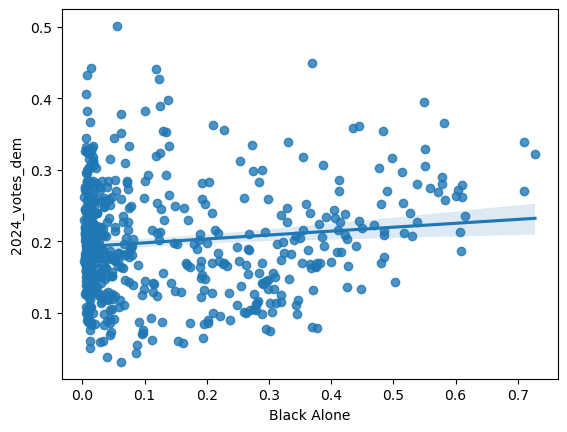

In [970]:
import seaborn as sns

sns.regplot(x='Black Alone',
            y='2024_votes_dem',
            data = key_county_overall)
plt.show()

#### To formalise this process I ran a number of the most interesting variables through the Linear Regressor, one at a time. 
#### I did this with, firstly, 2020 Democratic votes and, secondly, with 2024 Democratic votes. 
#### Expectedly, the R^2 values of each regression were very low but it did show some shifts in some coefficients.

In [971]:
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Results = {}

variables = ['Metro_2023','White Alone', 'Black Alone','Asian Alone',
        'Hispanic', 'Population 18-24', 'Population 25-44',
       'Population 45-64', 'Population 65+', 'Male Population',
       'Female Population']

for variable in variables:
    VarResult = {}
    
    lr= LinearRegression()

    y_data = key_county_overall_Rob['2020_votes_dem']
    x_data= key_county_overall_Rob[[variable]]

    lr.fit(x_data, y_data)

    R2_score = lr.score(x_data, y_data)
    
    VarResult["2020 Coefficient"] = lr.coef_
    
    y_data = key_county_overall_Rob['2024_votes_dem']
    x_data= key_county_overall_Rob[[variable]]

    lr.fit(x_data, y_data)

    R2_score = lr.score(x_data, y_data)
    
    VarResult["2024 Coefficient"] = lr.coef_
    VarResult["Change"] = VarResult["2024 Coefficient"] - VarResult["2020 Coefficient"]
    
    Results[variable] = VarResult
    
results_df = pd.DataFrame(Results).transpose()
results_df.sort_values(by = "2024 Coefficient")

,2020 Coefficient,2024 Coefficient,Change
White Alone,[-0.2366989047366621],[-0.1881589953515526],[0.04853990938510952]
Male Population,[-0.13561773901778615],[-0.14283707089296316],[-0.00721933187517701]
Hispanic,[-0.0787635876490202],[-0.07906750081743862],[-0.000303913168418421]
Population 45-64,[-0.009274353625305681],[-0.004098714881249062],[0.005175638744056619]
Population 65+,[0.014390084595445557],[-0.000869750908494385],[-0.015259835503939941]
Population 25-44,[0.019845026833977618],[0.029087409930493306],[0.009242383096515688]
Population 18-24,[0.04746451729470839],[0.05361154501961079],[0.006147027724902401]
Black Alone,[0.15737879824207618],[0.11452002601482102],[-0.04285877222725516]
Female Population,[0.1264172336490157],[0.13459740466074738],[0.008180171011731685]
Asian Alone,[0.18446799566351818],[0.19377742668755876],[0.009309431024040582]


### Interpretation

#### The above table is the results of the linear regression coefficients when each variable is tested individually, sorted by the 2024 vote coefficient. 
#### This shows higher proportions of White, Male, Hispanic and voters above 45, being associated with lower levels of Democrat support. 
#### The other variables being associated with higher levels of Democrat support. This gives an indication of the types of voters that the Democrats struggled most with in 2024. 
#### The "Change" columns compares the coefficient to 2020 and suggests that the Democrats did worse in 2024 in areas with higher proportions of Men, Hispanics, those aged over 65 and Blacks than compared with 2020. 
#### This fits some of the popular narrative and indicates that any future, successful Democrat candidate would have to be able to reverse these trends.

### Evaluation and next steps

#### What is unsatisfactory about this approach is that it does little to seperate the impact of each variable as well as not providing a confidence interval for the coefficients

#### To overcome this, the OLS function was used which can provide a summary of the coefficients in the multi-variate linear regression as well as p values for each variable's coefficient. 
#### Starting with all of the variables in the datasets in the regression, itertively the worst performing variable was removed from the regression and it was run again until a model where each variable had a p-value of less than 0.05 was reached. 
#### Multicollinearity was also inspected but for the variables that were closely correlated eg Male Population and Female Population, one of them quickly fell out of the confidence interval.

### 2020 best model

In [959]:
import statsmodels.api as sm
import pandas as pd

var= ['Median_Household_Income_2022', 'Black Alone', 'Asian Alone', 'Hispanic', 'Population 18-24', 'Population 25-44',
      'Population 65+', 'Male Population']

# defining the variables
x = key_county_overall_Rob[var]
y = key_county_overall_Rob['2020_votes_dem'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()

# printing the summary table
results = result.summary()

results_as_html = results.tables[1].as_html()
results_best_2020 = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [972]:
results_best_2020

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.2857,0.036,-8.013,0.000,-0.356,-0.216
Median_Household_Income_2022,0.4362,0.043,10.207,0.000,0.352,0.520
Black Alone,0.3574,0.039,9.087,0.000,0.280,0.435
Asian Alone,0.1368,0.018,7.451,0.000,0.101,0.173
Hispanic,-0.1162,0.025,-4.584,0.000,-0.166,-0.066
Population 18-24,0.1146,0.019,6.092,0.000,0.078,0.152
Population 25-44,0.2003,0.065,3.099,0.002,0.073,0.327
Population 65+,0.5756,0.066,8.679,0.000,0.445,0.706
Male Population,-0.0914,0.022,-4.201,0.000,-0.134,-0.049


### 2024 best model

In [965]:
import statsmodels.api as sm
import pandas as pd

var= ['Unemployment_rate_change_2020_to_2023',
       'Median_Household_Income_2022', 'Black Alone',
       'American Indian or Alaskan Native', 'Asian Alone', 'Hispanic', 'Population 18-24', 'Population 25-44',
      'Population 65+',
       'Female Population']

# defining the variables
x = key_county_overall_Rob[var]
y = key_county_overall_Rob['2024_votes_dem'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()

# printing the summary table
results = result.summary()

results_as_html = results.tables[1].as_html()
results_best_2024 = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [973]:
results_best_2024

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.3670,0.033,-11.048,0.0,-0.432,-0.302
Unemployment_rate_change_2020_to_2023,-0.2816,0.031,-9.163,0.0,-0.342,-0.221
Median_Household_Income_2022,0.5883,0.039,15.065,0.0,0.512,0.665
Black Alone,0.4144,0.036,11.452,0.0,0.343,0.485
American Indian or Alaskan Native,0.0108,0.003,4.201,0.0,0.006,0.016
Asian Alone,0.0960,0.017,5.785,0.0,0.063,0.129
Hispanic,-0.0909,0.023,-3.953,0.0,-0.136,-0.046
Population 18-24,0.1439,0.017,8.501,0.0,0.111,0.177
Population 25-44,0.2477,0.060,4.126,0.0,0.130,0.366
Population 65+,0.6380,0.062,10.359,0.0,0.517,0.759


### Vote change best model

In [956]:
import statsmodels.api as sm
import pandas as pd

var= ['Metro_2023',
       'Median_Household_Income_2022', 'Black Alone','Asian Alone', 'Population 18-24']

# defining the variables
x = key_county_overall_Rob[var]
y = key_county_overall_Rob['vote_dem_change'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()

# printing the summary table
results = result.summary()

 = results.tables[1].as_html()
results_best_change = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [974]:
results_best_change

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.0889,0.045,-1.991,0.047,-0.177,-0.001
Metro_2023,0.4248,0.079,5.392,0.000,0.270,0.579
Median_Household_Income_2022,0.3931,0.058,6.786,0.000,0.279,0.507
Black Alone,-0.2034,0.047,-4.341,0.000,-0.295,-0.111
Asian Alone,-0.1053,0.023,-4.614,0.000,-0.150,-0.060
Population 18-24,0.0621,0.021,2.973,0.003,0.021,0.103


### 2020 best model variables with 2024 votes as the dependent variable

In [958]:
import statsmodels.api as sm
import pandas as pd

var= ['Median_Household_Income_2022', 'Black Alone', 'Asian Alone', 'Hispanic', 'Population 18-24', 'Population 25-44',
      'Population 65+', 'Male Population']

# defining the variables
x = key_county_overall_Rob[var]
y = key_county_overall_Rob['2024_votes_dem'].tolist()

# adding the constant term
x = sm.add_constant(x)

# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()

results = result.summary()

results_as_html = results.tables[1].as_html()
results_best_2020_in_2024 = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [977]:
results_best_2020_in_2024

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.2819,0.035,-8.024,0.0,-0.351,-0.213
Median_Household_Income_2022,0.5187,0.042,12.322,0.0,0.436,0.601
Black Alone,0.3330,0.039,8.595,0.0,0.257,0.409
Asian Alone,0.1215,0.018,6.717,0.0,0.086,0.157
Hispanic,-0.1160,0.025,-4.644,0.0,-0.165,-0.067
Population 18-24,0.1317,0.019,7.110,0.0,0.095,0.168
Population 25-44,0.2573,0.064,4.041,0.0,0.132,0.382
Population 65+,0.6284,0.065,9.618,0.0,0.500,0.757
Male Population,-0.1092,0.021,-5.094,0.0,-0.151,-0.067


In [978]:
results_best_2020

,coef,std err,t,P>|t|,[0.025,0.975]
const,-0.2857,0.036,-8.013,0.000,-0.356,-0.216
Median_Household_Income_2022,0.4362,0.043,10.207,0.000,0.352,0.520
Black Alone,0.3574,0.039,9.087,0.000,0.280,0.435
Asian Alone,0.1368,0.018,7.451,0.000,0.101,0.173
Hispanic,-0.1162,0.025,-4.584,0.000,-0.166,-0.066
Population 18-24,0.1146,0.019,6.092,0.000,0.078,0.152
Population 25-44,0.2003,0.065,3.099,0.002,0.073,0.327
Population 65+,0.5756,0.066,8.679,0.000,0.445,0.706
Male Population,-0.0914,0.022,-4.201,0.000,-0.134,-0.049


### Interpretation

#### There are a number of interesting points that arise from this analysis above. 
#### The two most important results in answering the question "Who do Democrats need to do better with in 2028?" and in turn answer the question "Which candidate should they choose?" are "results_best_change" and comparing "results_best_2020_in_2024" with "results_best_2020". 
#### "results_best_change" takes the variable "vote_dem_change", created in the data manipulation and collection stage, as the dependent variable. 
#### This variable is the difference between the Democratic vote in 2020 and 2024. A positive coefficient means that the variable has a positive relationship with the dependent variable, ie it is associated with the Democrats doing better in 2024 compared to 2020. A negative coefficient means the opposite association. 
#### More 18-24 year olds, the county being designated as Metro and a higher household median income were associated with the Democrats actually increasing their vote. 
#### A higher proportion of Black and Asian voters was associated with the Democrats going backwards. These results are statistically significant in the 95% confidence interval.


#### The regression "results_best_2020_in_2024" take the variables that are in the best_2020 regression and uses "2024_votes_dem" as the dependent variable rather than "2020_votes_dem". 
#### Comparing this with the best_2020 regression coefficients, an understanding of how these have changed can be obtained. 
#### The most noteworthy points are that the coefficients for "Black Alone", "Asian Alone", "Male Population" have all decreased, indacting they are less associated with benefitting the Democrat vote in 2024 than they were in 2020. 
#### "Median_Household_Income_2022" saw a substantial increase in its coefficient suggesting it was more strongly associated with a higher Democratic vote in 2024 than in 2022.

### Evaluation

#### These multivariate linear regressions actually do quite a good job at explaining the dependent variables with R^2 figures of around 0.5 or above. A few things could be done to improve the models though. 
#### To take this further one could perform polynomial regressions of varying degrees in order to explore a polynomial rather than linear relationship. 
#### One could also explore the effectiveness of Ridge Regressions given the potential for multicollinearity. 
#### In addition, if these results were going to be used to predict future results, for example in other states, there would be a fear of overfitting. 
#### One interesting result which may require further investigation is that in both 2020 and 2024, a higher proportion of Hispanics reduced the number of Democrat votes. This is interesting because the common narrative is that the Hispanic vote maintained in 2020 and fell off in 2024 but this suggests that in these 2028 swing states, it was hurting them even in 2020. 

## How do the demographics of these states compare to the US overall?

### Age and sex demographics

In [1050]:
Swing_States = ss28['State'].to_list()
age_sex_comp = pd.DataFrame(columns = age_sex_2019.columns)

variables = age_sex_2019.columns.to_list()[5:]

age_sex_vars = {}

for i, Swing_State in enumerate(Swing_States):
    state_age_sex = age_sex_2019[(age_sex_2019['Description'] == Swing_State)]
    age_sex_comp = pd.concat([age_sex_comp, state_age_sex], ignore_index=True)

age_sex_vars["Description"] = "Overall"

for variable in variables:
    age_sex_vars[variable] = age_sex_comp[variable].sum()
    
age_sex_comp.loc[8] = age_sex_vars

US_age_sex = age_sex_2019[(age_sex_2019['Description'] == "U.S.")]
age_sex_comp = pd.concat([age_sex_comp, US_age_sex], ignore_index=True)

variables = variables[1:]

for i in range(0,10):
    for variable in variables:
        TotPop = age_sex_comp.loc[i, "Total Population"]
        Value =  age_sex_comp.loc[i, variable]
        age_sex_comp.loc[i, variable] = (Value/TotPop)
        
age_sex_comp.drop(['IBRC_Geo_ID', 'Statefips', 'Countyfips', 'Population 0-4', 'Population 5-17', 'Population Under 18', 'Population 18-54',
       'Population 55+'], axis=1, inplace=True)

age_sex_comp

,Description,Year,Total Population,Population 18-24,Population 25-44,Population 45-64,Population 65+,Male Population,Female Population
0,Minnesota,2019,5639632.0,0.088325,0.263881,0.253524,0.163199,0.498151,0.501923
1,New Hampshire,2019,1359711.0,0.090969,0.242196,0.292406,0.186704,0.495671,0.505118
2,Wisconsin,2019,5822434.0,0.093787,0.249775,0.264190,0.174711,0.497876,0.502493
3,Michigan,2019,9986857.0,0.094677,0.248105,0.265771,0.176772,0.492452,0.507341
4,Pennsylvania,2019,12801989.0,0.089217,0.251748,0.266285,0.186952,0.489955,0.509803
5,Georgia,2019,10617423.0,0.095615,0.270707,0.254976,0.142874,0.486529,0.514469
6,Nevada,2019,3080156.0,0.081236,0.280382,0.252489,0.161022,0.503061,0.500386
7,North Carolina,2019,10488084.0,0.094449,0.259294,0.259932,0.166960,0.486994,0.514275
8,Overall,NaN,59796286.0,0.092172,0.258039,0.261553,0.169145,0.491594,0.508958
9,U.S.,2019,328239523.0,0.092064,0.266877,0.253850,0.164692,0.492605,0.507671


#### Conclusion: There are some variations across the states but the demographics of each state and the swing states overall is broadly in line with the US average

### Race demographics

In [1057]:
race_comp = pd.DataFrame(columns = race_2019.columns)

variables = race_2019.columns.to_list()[5:]

race_vars = {}

for i, Swing_State in enumerate(Swing_States):
    state_race = race_2019[(race_2019['Description'] == Swing_State)]
    race_comp = pd.concat([race_comp, state_race], ignore_index=True)

race_vars["Description"] = "Overall"

for variable in variables:
    race_vars[variable] = race_comp[variable].sum()
    
race_comp.loc[8] = race_vars

US_race = race_2019[(race_2019['Description'] == "U.S.")]
race_comp = pd.concat([race_comp, US_race], ignore_index=True)

variables = variables[1:]

for i in range(0,10):
    for variable in variables:
        TotPop = race_comp.loc[i, "Total Population"]
        Value =  race_comp.loc[i, variable]
        race_comp.loc[i, variable] = (Value/TotPop)
        
race_comp.drop(['IBRC_Geo_ID', 'Statefips', 'Countyfips', 'Hawaiian or Pacific Islander Alone', 'Two or More Races',
       'Not Hispanic'], axis=1, inplace=True)

race_comp

,Description,Year,Total Population,White Alone,Black Alone,American Indian or Alaskan Native,Asian Alone,Hispanic
0,Minnesota,2019,5639632.0,0.837631,0.070139,0.013738,0.051866,0.055878
1,New Hampshire,2019,1359711.0,0.931152,0.017924,0.003026,0.029639,0.040148
2,Wisconsin,2019,5822434.0,0.870389,0.067076,0.011787,0.030104,0.070968
3,Michigan,2019,9986857.0,0.792198,0.140974,0.007396,0.033683,0.052890
4,Pennsylvania,2019,12801989.0,0.816050,0.120301,0.003959,0.037641,0.078125
5,Georgia,2019,10617423.0,0.601983,0.325705,0.005275,0.043699,0.098774
6,Nevada,2019,3080156.0,0.739427,0.102691,0.016865,0.087062,0.292388
7,North Carolina,2019,10488084.0,0.705514,0.222211,0.015789,0.031874,0.097809
8,Overall,NaN,59796286.0,0.760666,0.164951,0.009170,0.040015,0.088407
9,U.S.,2019,328239523.0,0.763230,0.134277,0.012759,0.059423,0.184537


#### Conclusion: There are two very interesting insights from this data relating to the "Black Alone" and "Hispanic" variables.
#### The Hispanic population across the 8 swing states is just 8.8% compared with 18.4% across the US. This 8.8% figure is also screwed by the 29.2% of Nevada that is Hispanic.
#### The Black population in the swing states is 16.4% which is above the figure of 13.4% across the US. This is scewed slightly by the high figures in Georgia and North Carolina but other states such as Michigan and Pennsylvania also have high Black populations.

### Economic demographics

In [1066]:
econ_comp = pd.DataFrame(columns = economic_data.columns)

variables = economic_data.columns.to_list()[4:]

econ_vars = {}

for i, Swing_State in enumerate(Swing_States):
    state_econ = economic_data[(economic_data['Area_Name'] == Swing_State)]
    econ_comp = pd.concat([econ_comp, state_econ], ignore_index=True)

econ_vars["Area_Name"] = "Overall"

for variable in variables:
    econ_vars[variable] = econ_comp[variable].sum()/8
    
econ_comp.loc[8] = econ_vars

US_econ = economic_data[(economic_data['Area_Name'] == "United States")]
econ_comp = pd.concat([econ_comp, US_econ], ignore_index=True)
        
econ_comp.drop(['FIPS_Code', 'State', 'Metro_2023', 'Employed_2023', 'Unemployed_2023'], axis=1, inplace=True)

econ_comp

,Area_Name,Unemployment_rate_2020,Unemployment_rate_2023,Median_Household_Income_2022
0,Minnesota,6.3,2.8,82343
1,New Hampshire,6.7,2.2,90750
2,Wisconsin,6.4,3,71050
3,Michigan,10,3.9,66926
4,Pennsylvania,8.9,3.4,71789
5,Georgia,6.5,3.2,72742
6,Nevada,13.5,5.1,72348
7,North Carolina,7.2,3.5,67516
8,Overall,8.1875,3.3875,74433.0
9,United States,8.1,3.6,74755


#### Conclusion: There are some variations across the states for each of these metrics, for example the Median Household Income in New Hampshire and the unemployment rate in Nevada being high but the swing states overall is broadly in line with the US average. 

### Conclusions

#### The purpose of this analysis is to identify which dempgraphics the Democratic candidate will need to do well with in order to win in 2028.

#### The analysis above shows that the two most important demographics are Men and Blacks.

#### These both saw negative change from the Democrats point of view between 2020 and 2024 and in the case of Blacks, will hold a disproportionate influence in the 2028 swing states when compared to the rest of the US.

#### It may seem that Hispanics should be included in this conclusion too but the analysis on the demographics of the swing states as a whole shows that they are under-represented in the 2028 swing states.

#### This is not to say that the candidate should only appeal to these two segments of the population but amongst them the Democrats have seen the most significant decline and they hold significant power in the states that matter.